# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

api_key

'8e6415ff56a217c69672fb5619f8815b'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
num = 0
name = []

temp = []
hum = []
cloud = []
wind = []
country = []
lat = []
lon = []
date = []

for x in cities:
    try:    
        city = x
        query_url = f"{url}appid={api_key}&q={city}&units={units}"
        data = requests.get(query_url).json()
        cname = data['name']
        name.append(cname)
        num += 1
        print(f'Processing data record {num}: {cname}')
        temp.append(data['main']['temp'])
        hum.append(data['main']['humidity'])
        cloud.append(data['clouds']['all'])
        wind.append(data['wind']['speed'])
        country.append(data['sys']['country'])
        lat.append(data['coord']['lat'])
        lon.append(data['coord']['lon'])
        date.append(data['dt'])
    except KeyError:
        print(f"{data['message']}.  Skipping...")

Processing data record 1: Busselton
city not found.  Skipping...
Processing data record 2: San Antonio
Processing data record 3: Mumford
Processing data record 4: Bosaso
Processing data record 5: Deputatskiy
Processing data record 6: Ushuaia
Processing data record 7: Sobolevo
Processing data record 8: Gari
Processing data record 9: Kungurtug
Processing data record 10: Mar del Plata
Processing data record 11: Am Timan
Processing data record 12: Dubti
Processing data record 13: Chililabombwe
city not found.  Skipping...
Processing data record 14: Mecca
Processing data record 15: Mount Isa
Processing data record 16: Cabo San Lucas
Processing data record 17: Itoman
Processing data record 18: Maunabo
Processing data record 19: Cape Town
Processing data record 20: Punta Arenas
Processing data record 21: Oktyabrskoye
Processing data record 22: Naron
Processing data record 23: Thompson
Processing data record 24: Vaini
Processing data record 25: Atuona
Processing data record 26: Saldanha
Proces

Processing data record 202: Bredasdorp
Processing data record 203: Xuddur
Processing data record 204: Lasa
Processing data record 205: Bogande
Processing data record 206: Natal
Processing data record 207: Mineros
Processing data record 208: Naklo nad Notecia
Processing data record 209: Buta
Processing data record 210: Komsomolskiy
Processing data record 211: Synya
Processing data record 212: Lokachi
Processing data record 213: Palana
city not found.  Skipping...
Processing data record 214: Bowen
Processing data record 215: Hasaki
city not found.  Skipping...
Processing data record 216: Airai
Processing data record 217: Tsilna
Processing data record 218: Sungaipenuh
Processing data record 219: Warwick
city not found.  Skipping...
Processing data record 220: Srednekolymsk
Processing data record 221: Tignere
Processing data record 222: Katangli
city not found.  Skipping...
Processing data record 223: Ponta do Sol
city not found.  Skipping...
Processing data record 224: Castle Douglas
Proc

Processing data record 404: Varberg
Processing data record 405: Sao Gabriel da Cachoeira
Processing data record 406: Los Llanos de Aridane
city not found.  Skipping...
Processing data record 407: Poum
Processing data record 408: Port Angeles
Processing data record 409: Road Town
city not found.  Skipping...
Processing data record 410: Coquimbo
Processing data record 411: Touros
Processing data record 412: Cavalcante
Processing data record 413: Rocha
Processing data record 414: Santiago de Chuco
Processing data record 415: Reo
Processing data record 416: Minot
Processing data record 417: Herouville-Saint-Clair
Processing data record 418: Hokitika
Processing data record 419: Vestmannaeyjar
Processing data record 420: Myitkyina
Processing data record 421: Nadadores
Processing data record 422: Marawi
Processing data record 423: Snezhnogorsk
Processing data record 424: Myrtle Beach
Processing data record 425: Mareeba
city not found.  Skipping...
city not found.  Skipping...
Processing data 

In [36]:
# date = pd.to_datetime(date,unit='s')
# date = date.date()

weather_df = pd.DataFrame({
                  "City":name,
                  "Country":country,
                  "Latitude":lat,
                  "Longitude":lon,
                  "Temperature":temp,
                  "Cloudiness":cloud,
                  "Humidity":hum,
                  "Wind Speed":wind,
                  "Date":date
})

weather_df['Date'] = pd.to_datetime(weather_df['Date'],unit='s')
weather_df['Date'] = str(weather_df['Date'])
weather_df['Date'] = weather_df['Date'][0][6:16]

weather_df.head(10)

,City,Country,Latitude,Longitude,Temperature,Cloudiness,Humidity,Wind Speed,Date
0,Busselton,AU,-33.64,115.35,2.66,8,71,4.56,2019-08-23
1,San Antonio,CL,-33.58,-71.61,18.58,0,26,5.70,2019-08-23
2,Mumford,GH,5.26,-0.76,23.77,81,89,4.33,2019-08-23
3,Bosaso,SO,11.28,49.18,30.47,19,69,2.14,2019-08-23
4,Deputatskiy,RU,69.30,139.90,9.97,86,83,0.92,2019-08-23
5,Ushuaia,AR,-54.81,-68.31,6.00,75,70,5.10,2019-08-23
6,Sobolevo,RU,54.43,31.90,13.47,0,81,0.87,2019-08-23
7,Gari,RU,59.43,62.35,13.17,5,75,4.74,2019-08-23
8,Kungurtug,RU,50.60,97.53,8.17,23,79,1.11,2019-08-23
9,Mar del Plata,AR,-46.43,-67.52,10.27,100,54,3.94,2019-08-23


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [38]:
cities_df = pd.DataFrame({"City":cities})

cities_df.to_csv(output_data_file)

cities_df.head(10)

,City
0,busselton
1,palasa
2,san antonio
3,mumford
4,bosaso
5,deputatskiy
6,ushuaia
7,sobolevo
8,gari
9,kungurtug


In [39]:
weather_df.head()

,City,Country,Latitude,Longitude,Temperature,Cloudiness,Humidity,Wind Speed,Date
0,Busselton,AU,-33.64,115.35,2.66,8,71,4.56,2019-08-23
1,San Antonio,CL,-33.58,-71.61,18.58,0,26,5.70,2019-08-23
2,Mumford,GH,5.26,-0.76,23.77,81,89,4.33,2019-08-23
3,Bosaso,SO,11.28,49.18,30.47,19,69,2.14,2019-08-23
4,Deputatskiy,RU,69.30,139.90,9.97,86,83,0.92,2019-08-23


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

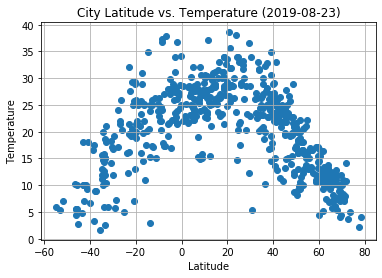

In [40]:
plt.scatter(x=weather_df['Latitude'],y=weather_df['Temperature'])

plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title(f"City Latitude vs. Temperature ({str(weather_df['Date'][0])})")
plt.grid()

plt.savefig("output_data/lat_temp.png")

#### Latitude vs. Humidity Plot

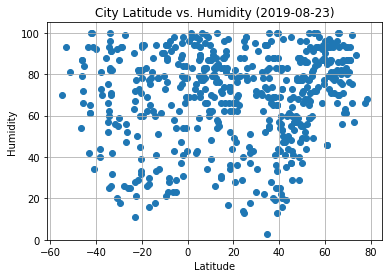

In [41]:
plt.scatter(x=weather_df['Latitude'],y=weather_df['Humidity'])

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f"City Latitude vs. Humidity ({str(weather_df['Date'][0])})")
plt.ylim(0, 105)
plt.grid()

plt.savefig("output_data/lat_humid.png")

#### Latitude vs. Cloudiness Plot

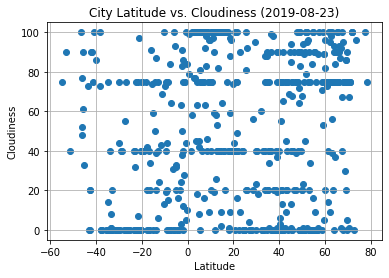

In [42]:
plt.scatter(x=weather_df['Latitude'],y=weather_df['Cloudiness'])

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f"City Latitude vs. Cloudiness ({str(weather_df['Date'][0])})")
plt.grid()

plt.savefig("output_data/lat_cloud.png")

#### Latitude vs. Wind Speed Plot

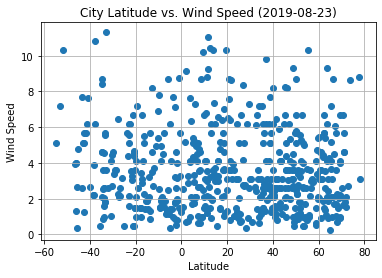

In [43]:
plt.scatter(x=weather_df['Latitude'],y=weather_df['Wind Speed'])

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f"City Latitude vs. Wind Speed ({str(weather_df['Date'][0])})")
plt.grid()

plt.savefig("output_data/lat_wind.png")